In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
#!pip install sklearn

In [3]:
df=pd.read_csv('moderate.csv')
df

,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NO_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
0,Dhaka,79.44,97.78,3.10,8.74,447.27,0.0,52.93,3.71,164.800000,Moderate,97.780000,164.800000,3.8750,0.0,0.9275,2831.000000,52.93
1,Faridpur,91.44,110.78,7.51,9.00,540.73,0.0,49.35,4.37,204.800000,Poor,107.186667,204.800000,9.3875,0.0,1.0925,3380.764706,49.35
2,Gazipur,77.78,95.25,2.44,6.34,423.91,0.0,51.50,4.18,159.266667,Moderate,95.250000,159.266667,3.0500,0.0,1.0450,2693.588235,51.50
3,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.0,95.84,27.87,321.200000,Very Poor,143.126667,321.200000,19.9625,0.0,6.9675,4480.294118,95.84
4,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.0,73.67,23.31,370.923077,Very Poor,190.346667,370.923077,22.3500,0.0,5.8275,6404.470588,73.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,Kushtia,27.16,36.02,2.47,10.88,654.22,0.0,31.11,21.53,45.266667,Good,36.020000,45.266667,3.0875,0.0,5.3825,4048.352941,31.11
6205,Magura,20.30,25.69,2.03,7.63,567.44,0.0,50.78,16.72,33.833333,Good,25.690000,33.833333,2.5375,0.0,4.1800,3537.882353,50.78
6206,Meherpur,21.21,28.46,2.09,8.05,594.14,0.0,45.42,21.79,35.350000,Good,28.460000,35.350000,2.6125,0.0,5.4475,3694.941176,45.42
6207,Narail,16.24,19.98,1.64,5.40,520.71,0.0,57.94,13.05,27.066667,Good,19.980000,27.066667,2.0500,0.0,3.2625,3263.000000,57.94


<AxesSubplot:>

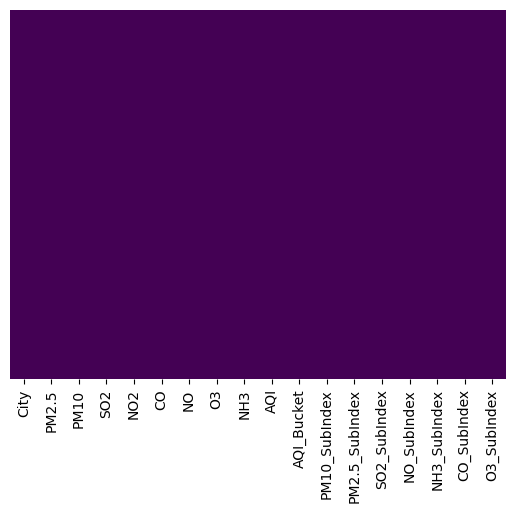

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
print(df.isnull().sum())

City              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
NO                0
O3                0
NH3               0
AQI               0
AQI_Bucket        0
PM10_SubIndex     0
PM2.5_SubIndex    0
SO2_SubIndex      0
NO_SubIndex       0
NH3_SubIndex      0
CO_SubIndex       0
O3_SubIndex       0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6209 entries, 0 to 6208
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            6209 non-null   object 
 1   PM2.5           6209 non-null   float64
 2   PM10            6209 non-null   float64
 3   SO2             6209 non-null   float64
 4   NO2             6209 non-null   float64
 5   CO              6209 non-null   float64
 6   NO              6209 non-null   float64
 7   O3              6209 non-null   float64
 8   NH3             6209 non-null   float64
 9   AQI             6209 non-null   float64
 10  AQI_Bucket      6209 non-null   object 
 11  PM10_SubIndex   6209 non-null   float64
 12  PM2.5_SubIndex  6209 non-null   float64
 13  SO2_SubIndex    6209 non-null   float64
 14  NO_SubIndex     6209 non-null   float64
 15  NH3_SubIndex    6209 non-null   float64
 16  CO_SubIndex     6209 non-null   float64
 17  O3_SubIndex     6209 non-null   f

In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

City              0.0
PM2.5             0.0
CO_SubIndex       0.0
NH3_SubIndex      0.0
NO_SubIndex       0.0
SO2_SubIndex      0.0
PM2.5_SubIndex    0.0
PM10_SubIndex     0.0
AQI_Bucket        0.0
AQI               0.0
NH3               0.0
O3                0.0
NO                0.0
CO                0.0
NO2               0.0
SO2               0.0
PM10              0.0
O3_SubIndex       0.0
dtype: float64

In [8]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NO_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
count,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000
mean,86.308657,101.599535,5.994820,9.284247,755.449404,0.711828,82.109757,14.408726,179.030786,93.518995,179.004177,7.493526,0.882992,3.602182,4643.820024,91.525295
std,56.419543,65.374778,6.479383,10.503181,416.168298,4.607528,58.533259,16.639882,115.303594,54.850934,115.266488,8.099228,5.590206,4.159970,2448.048811,75.372481
min,0.720000,1.080000,0.020000,0.160000,247.000000,0.000000,0.000000,0.000000,1.216667,1.080000,1.200000,0.025000,0.000000,0.000000,1652.941176,0.000000
25%,45.040000,52.700000,1.770000,2.790000,507.360000,0.000000,33.980000,4.370000,75.066667,52.700000,75.066667,2.212500,0.000000,1.092500,3184.470588,33.980000
50%,82.190000,97.220000,3.610000,6.340000,667.570000,0.070000,71.530000,8.870000,173.966667,97.220000,173.966667,4.512500,0.087500,2.217500,4126.882353,71.530000
75%,117.110000,138.000000,7.870000,12.170000,894.550000,0.280000,118.730000,19.000000,290.366667,125.333333,290.366667,9.837500,0.350000,4.750000,5462.058824,127.544118
max,629.840000,677.990000,65.800000,153.540000,8331.300000,141.260000,366.210000,188.470000,709.987500,709.987500,692.184615,82.250000,161.260000,47.117500,49207.647059,329.352505


In [9]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'NO', 'O3', 'NH3', 'AQI',
       'AQI_Bucket', 'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NO_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [10]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'NO', 'O3', 'NH3', 'AQI',
       'AQI_Bucket', 'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NO_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

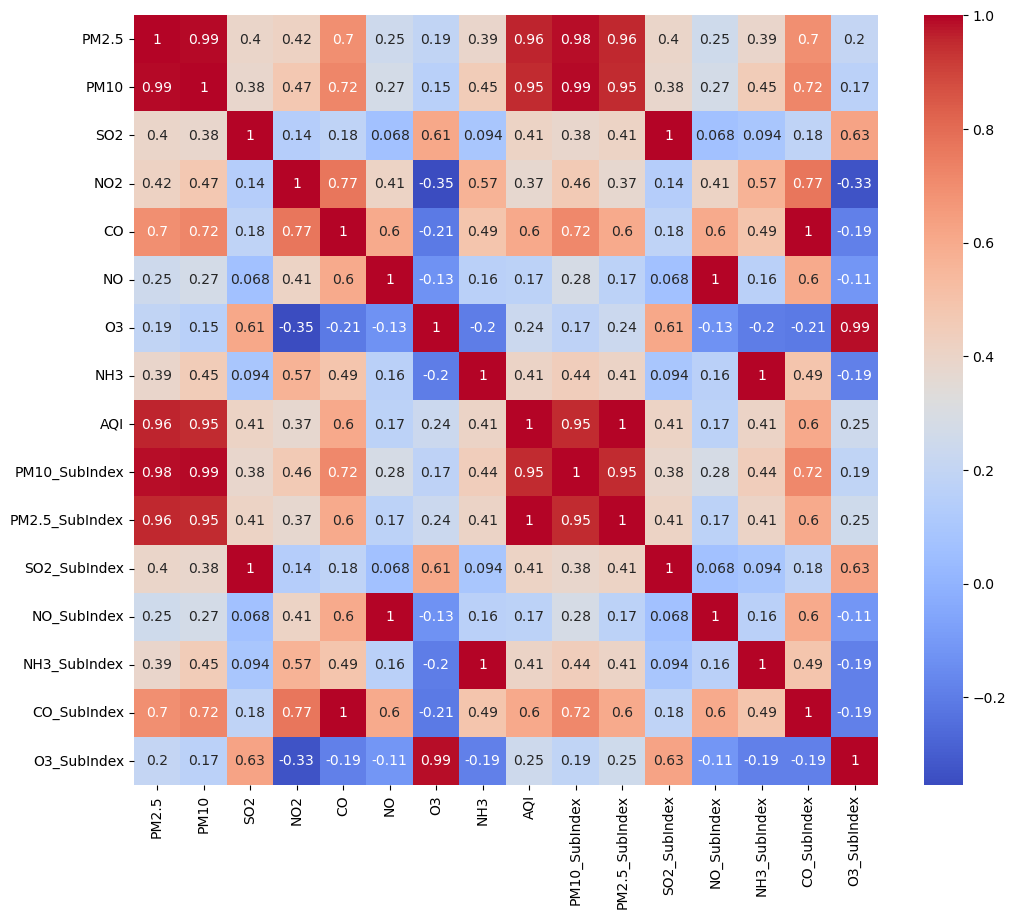

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Distribution of different pollutants in last 3 months


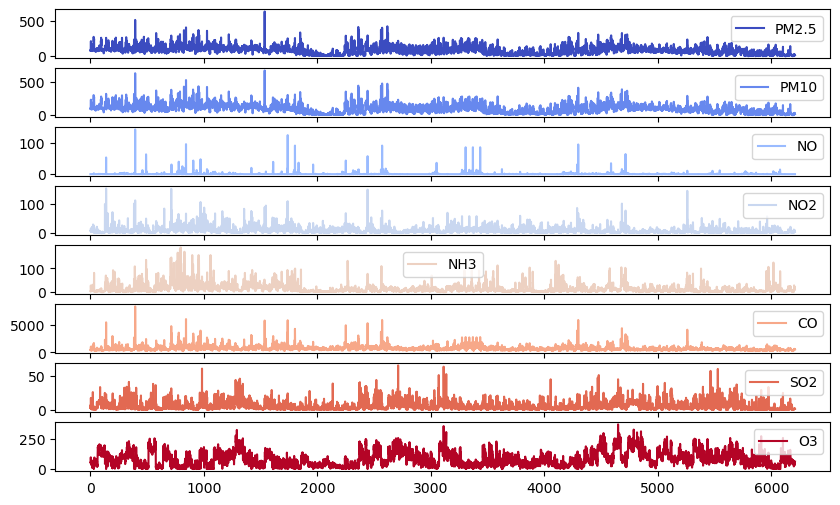

In [12]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2','O3']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 3 months')
df_city_day.plot(kind='line',figsize=(10,6),cmap='coolwarm',subplots=True,fontsize=10);

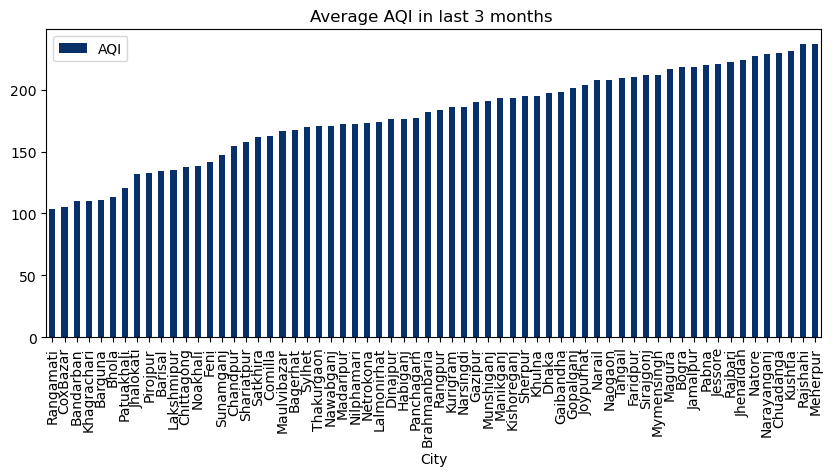

In [13]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(10,4))
plt.title('Average AQI in last 3 months ');

In [14]:
#Creating Model for predicting the Output
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
0,164.800000,Moderate
1,204.800000,Poor
2,159.266667,Moderate
3,321.200000,Very Poor
4,370.923077,Very Poor
...,...,...
6204,45.266667,Good
6205,33.833333,Good
6206,35.350000,Good
6207,27.066667,Good


In [15]:
final_df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [16]:

final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :1, 'Satisfactory' :2, 'Moderate' :3, 'Poor' :4, 'Very Poor' :5,'Severe':6}).astype(int) #mapping numbers
final_df.head()

,AQI,AQI_Bucket
0,164.800000,3
1,204.800000,4
2,159.266667,3
3,321.200000,5
4,370.923077,5


In [17]:

X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [18]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Accuracy: 1.0
Training Accuracy: 1.0
Testing Accuracy: 1.0


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
[[317   0   0   0   0   0]
 [  0 284   0   0   0   0]
 [  0   0 420   0   0   0]
 [  0   0   0 377   0   0]
 [  0   0   0   0 444   0]
 [  0   0   0   0   0  21]]


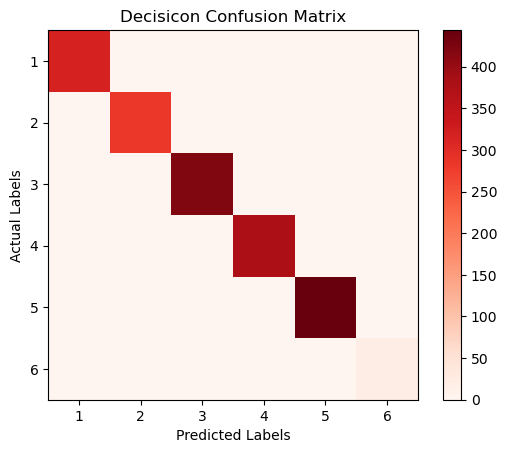

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
d_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
d_f1 = f1_score(y_test, y_pred, average='weighted')
c = confusion_matrix(y_test, y_pred)
print("Accuracy:", d_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", d_f1)
print(c)
# Plot the confusion matrix as a heatmap
plt.imshow(c, cmap=plt.cm.Reds)
plt.title("Decisicon Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
plt.show()

In [20]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
clf = SVC(kernel='rbf', random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Accuracy: 0.9817498658078369
Training Accuracy: 0.9864242982052462
Testing Accuracy: 0.9817498658078369


In [21]:
s_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
s_f1 = f1_score(y_test, y_pred, average='weighted')
c = confusion_matrix(y_test, y_pred)
print("Accuracy:", s_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", s_f1)
print(c)

Accuracy: 0.9817498658078369
Precision: 0.982274258658583
Recall: 0.9817498658078369
F1 Score: 0.9816632296683814
[[317   0   0   0   0   0]
 [  3 281   0   0   0   0]
 [  0  10 408   2   0   0]
 [  0   0   0 362  15   0]
 [  0   0   0   0 444   0]
 [  0   0   0   0   4  17]]


In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9817498658078369
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       317
           2       0.97      0.99      0.98       284
           3       1.00      0.97      0.99       420
           4       0.99      0.96      0.98       377
           5       0.96      1.00      0.98       444
           6       1.00      0.81      0.89        21

    accuracy                           0.98      1863
   macro avg       0.98      0.96      0.97      1863
weighted avg       0.98      0.98      0.98      1863

[[317   0   0   0   0   0]
 [  3 281   0   0   0   0]
 [  0  10 408   2   0   0]
 [  0   0   0 362  15   0]
 [  0   0   0   0 444   0]
 [  0   0   0   0   4  17]]


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)


clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

y_pred = clf.predict(X_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
TP, FN, FP, TN = matrix.reshape(-1)
print('Values of TP, FN, FP, TN:', TP, FN, FP, TN)


acc_func = accuracy_score(y_test, y_pred)
print('Accuracy from function:', acc_func)
acc_form = (TP + TN) / (TP + FN + FP + TN)
print('Accuracy from formula:', acc_form)


prec_func = precision_score(y_test, y_pred, average='weighted')

print('Precision from function:', prec_func)
prec_form = TP / (TP + FP)
print('Precision from formula:', prec_form)


rec_func = recall_score(y_test, y_pred, average='weighted')

print('Recall from function:', rec_func)
rec_form = TP / (TP + FN)
print('Recall from formula:', rec_form)


f1_func = f1_score(y_test, y_pred,average='weighted')
print('F1-score from function: ', f1_func)
f1_form = (2 * prec_form * rec_form) / (prec_form + rec_form)
print('F1-score from formula: ', f1_form)


Training Accuracy: 1.0
Testing Accuracy: 1.0
Values of TP, FN, FP, TN: 317 0 0 0
Accuracy from function: 1.0
Accuracy from formula: 1.0
Precision from function: 1.0
Precision from formula: 1.0
Recall from function: 1.0
Recall from formula: 1.0
F1-score from function:  1.0
F1-score from formula:  1.0


In [24]:
# Print the F1-score and accuracy of each model
print("SVM - F1-score:", s_f1, "Accuracy:", s_accuracy)
print("Decision Tree - F1-score:", d_f1, "Accuracy:", d_accuracy)
print("Random Forest - F1-score:", f1_func, "Accuracy:", acc_func)

SVM - F1-score: 0.9816632296683814 Accuracy: 0.9817498658078369
Decision Tree - F1-score: 1.0 Accuracy: 1.0
Random Forest - F1-score: 1.0 Accuracy: 1.0


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Load the dataset into a Pandas DataFrame
df

# Preprocess the data by separating the input features (X) and the target variable (y)
X = df.drop("AQI_Bucket", axis=1)  # Input features
y = df["AQI_Bucket"]  # Target variable

# Encode the categorical features using one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)


Accuracy: 0.5161030595813204
F1-score: 0.5094117113605413
Classification Report:
               precision    recall  f1-score   support

        Good       0.63      0.68      0.65       220
    Moderate       0.44      0.46      0.45       281
        Poor       0.48      0.43      0.45       270
Satisfactory       0.42      0.36      0.39       178
      Severe       0.00      0.00      0.00        12
   Very Poor       0.57      0.65      0.61       281

    accuracy                           0.52      1242
   macro avg       0.42      0.43      0.43      1242
weighted avg       0.51      0.52      0.51      1242



G:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset into a Pandas DataFrame
data = df # Replace 'df' with your actual DataFrame

# Preprocess the data by separating the input features (X) and the target variable (y)
X = data.drop("AQI_Bucket", axis=1)  # Input features
y = data["AQI_Bucket"]  # Target variable

# Perform one-hot encoding for categorical feature "City"
X = pd.get_dummies(X)

# Convert data type to float
X = X.astype(float)

# Encode the target variable using label encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_labels = encoder.inverse_transform(y_pred_prob.argmax(axis=1))

# Convert the true labels back to their original values
y_test_labels = encoder.inverse_transform(y_test)

# Evaluate the model's performance
a_accuracy = accuracy_score(y_test_labels, y_pred_labels)
a_f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
classification_report = classification_report(y_test_labels, y_pred_labels)

print("Accuracy:", a_accuracy)
print("F1 Score:", a_f1)
print("Classification Report:\n", classification_report)


Epoch 1/100
156/156 [==============================] - 2s 2ms/step - loss: 16.4290 - accuracy: 0.3578
Epoch 2/100
156/156 [==============================] - 0s 2ms/step - loss: 4.4387 - accuracy: 0.4814
Epoch 3/100
156/156 [==============================] - 0s 2ms/step - loss: 5.0435 - accuracy: 0.4717
Epoch 4/100
156/156 [==============================] - 0s 2ms/step - loss: 3.5929 - accuracy: 0.5297
Epoch 5/100
156/156 [==============================] - 0s 2ms/step - loss: 3.6248 - accuracy: 0.5454
Epoch 6/100
156/156 [==============================] - 0s 2ms/step - loss: 4.0634 - accuracy: 0.5557
Epoch 7/100
156/156 [==============================] - 0s 2ms/step - loss: 4.5652 - accuracy: 0.5543
Epoch 8/100
156/156 [==============================] - 0s 3ms/step - loss: 2.0121 - accuracy: 0.6342
Epoch 9/100
156/156 [==============================] - 0s 2ms/step - loss: 2.7396 - accuracy: 0.5996
Epoch 10/100
156/156 [==============================] - 0s 3ms/step - loss: 3.6472 - accur

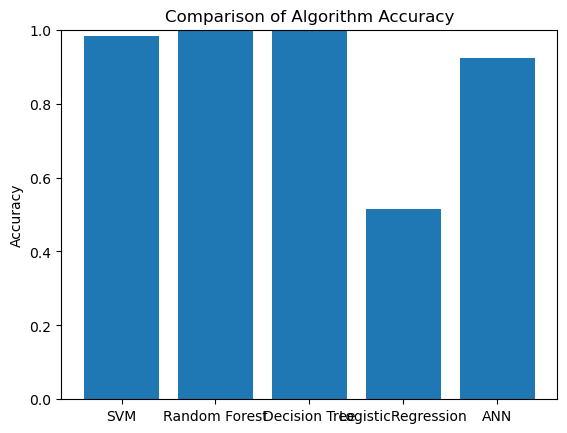

In [27]:
import matplotlib.pyplot as plt
plt.bar(['SVM', 'Random Forest', 'Decision Tree','LogisticRegression','ANN'], [s_accuracy, acc_func, d_accuracy,accuracy,a_accuracy])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracy')
plt.show()


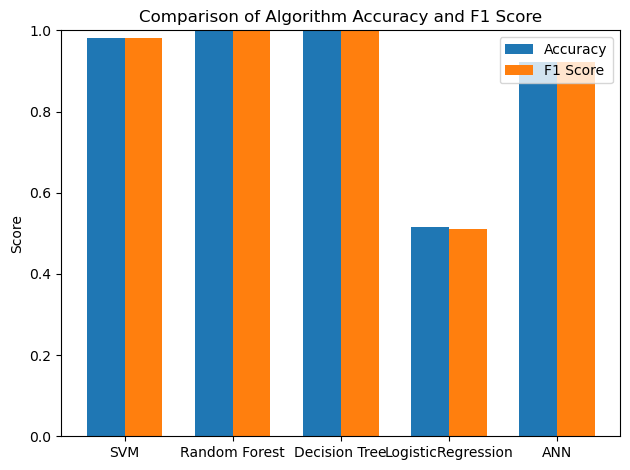

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy and F1 score values for each algorithm stored in lists
algorithms = ['SVM', 'Random Forest', 'Decision Tree','LogisticRegression','ANN']
accuracy = [s_accuracy, acc_func, acc_func,accuracy,a_accuracy]
f1_score = [s_f1, f1_func, d_f1,f1,a_f1]

x = np.arange(len(algorithms))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_score, width, label='F1 Score')

ax.set_ylim([0, 1])
ax.set_ylabel('Score')
ax.set_title('Comparison of Algorithm Accuracy and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

fig.tight_layout()
plt.show()


Moderate        1400
Very Poor       1380
Poor            1263
Good            1106
Satisfactory     991
Severe            69
Name: AQI_Bucket, dtype: int64


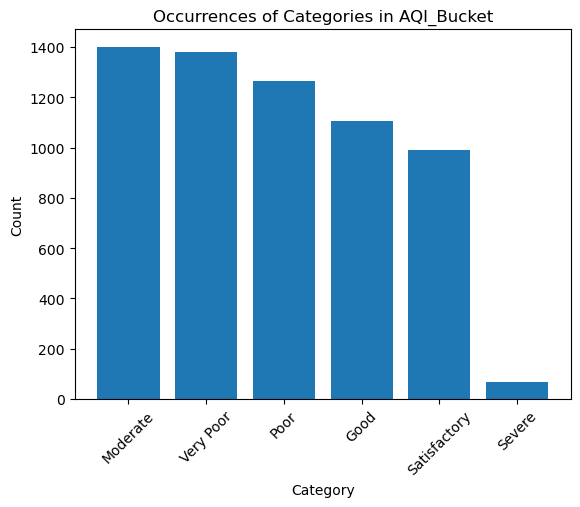

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df

# Select the column where you want to count the occurrences of each category
selected_column = 'AQI_Bucket'

# Count the occurrences of each category in the selected column
category_counts = df[selected_column].value_counts()
print(category_counts)
# Create a DataFrame for visualization
df_visualize = pd.DataFrame({'Category': category_counts.index,
                             'Count': category_counts.values})

# Plot the bar chart
plt.bar(df_visualize['Category'], df_visualize['Count'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Occurrences of Categories in ' + selected_column)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset into a Pandas DataFrame
data = df

# Preprocess the data by separating the input features (X) and the target variable (y)
X = data.drop("AQI_Bucket", axis=1)  # Input features
y = data["AQI_Bucket"]  # Target variable

# Encode the categorical features and target variable
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Create and train the RandomForest model with optimized hyperparameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.feature_importances_

# Match feature importances to their corresponding feature names
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)


# Select the most important features (e.g., top 5)
num_top_features = 5
selected_features = feature_importances_df['Feature'][:num_top_features]

# Filter the training and testing sets to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model with the selected features
model_selected = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)
model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the model with selected features
y_pred_selected = model_selected.predict(X_test_selected)

# Convert the predicted labels back to their original categorical values
y_pred_selected_categorical = label_encoder.inverse_transform(y_pred_selected.astype(int))

# Compare the actual and predicted labels
results_df = pd.DataFrame({'Actual': label_encoder.inverse_transform(y_test), 'Predicted': y_pred_selected_categorical})

# Print the results
print("Actual vs Predicted:")
print(results_df)

# Evaluate the model's performance using classification metrics
classification_report = classification_report(y_test, y_pred_selected.astype(int), target_names=label_encoder.classes_)
print("Classification Report:")
print(classification_report)


           Feature  Importance
9              AQI    0.347335
1            PM2.5    0.342663
11  PM2.5_SubIndex    0.310002
0             City    0.000000
15     CO_SubIndex    0.000000
14    NH3_SubIndex    0.000000
13     NO_SubIndex    0.000000
12    SO2_SubIndex    0.000000
10   PM10_SubIndex    0.000000
8              NH3    0.000000
7               O3    0.000000
6               NO    0.000000
5               CO    0.000000
4              NO2    0.000000
3              SO2    0.000000
2             PM10    0.000000
16     O3_SubIndex    0.000000
Actual vs Predicted:
            Actual     Predicted
0         Moderate      Moderate
1         Moderate      Moderate
2        Very Poor     Very Poor
3             Poor          Poor
4             Poor          Poor
...            ...           ...
1237  Satisfactory  Satisfactory
1238     Very Poor     Very Poor
1239     Very Poor     Very Poor
1240          Good          Good
1241  Satisfactory  Satisfactory

[1242 rows x 2 columns]
